In [ ]:
#import libraries
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
nba_player_salaries_top40 = []
team = []
salary = []

games_played = [] #Games Played
pts = []          #Points
ast = []          #Assists
reb = []          #Rebounds
stl = []          #Steals
blk = []          #Blocks
fga = []          #Field Goals Attempted
fgm = []          #Field Goals Made
fta = []          #Free Throws Attempted
ftm = []          #Free Throws Made
turnover = []     #turnover
per = []          #Player Efficiency Rating =（pts + reb + ast + stl + blk ）-（fga-fgm）-（fta-ftm）-turnover］/ games_played

In [ ]:
url = 'http://www.espn.com/nba/salaries' 
res = requests.request('GET', url=url) 
soup = BeautifulSoup(res.content, "html.parser") # store a beautiful object
for tr in soup.find_all('tr',limit=33): # first top 30 paid nba player
  td = tr.find_all('td')
  if len(td[1].get_text()) > 4:
    nba_player_salaries_top40.append(td[1].get_text().split(',')[0])
  if len(td[2].get_text()) > 4:
    team.append(td[2].get_text())
  if td[3].get_text() != 'SALARY':
    salary.append(float(td[3].get_text().replace('$','').replace(',','')))
dict1 = {
          "NAME":nba_player_salaries_top40,
          "TEAM":team,
          "SALARY":salary
}
df1 = pd.DataFrame(dict1)
df1

,NAME,TEAM,SALARY
0,Stephen Curry,Golden State Warriors,48070014.0
1,Russell Westbrook,Los Angeles Lakers,47063478.0
2,LeBron James,Los Angeles Lakers,44474988.0
3,Kevin Durant,Brooklyn Nets,44119845.0
4,Bradley Beal,Washington Wizards,43279250.0
5,Damian Lillard,Portland Trail Blazers,42492492.0
6,Giannis Antetokounmpo,Milwaukee Bucks,42492492.0
7,Kawhi Leonard,LA Clippers,42492492.0
8,Paul George,LA Clippers,42492492.0
9,Klay Thompson,Golden State Warriors,40600080.0


In [ ]:
def scrape_id(name):
  nba_player_salaries_top40_id = [] #According to the requirements of the API, I need to retrieve the corresponding player ID by name, and this list store the player's ID
  url =f'https://www.balldontlie.io/api/v1/players/?search={name}'
  res = requests.get(url)
  if(res.status_code == 200): #check connection status
    data = res.json() # returns a JSON object of the result 
    for x in data['data']:
      if x['first_name'] == name.split(" ")[0] and x['last_name'] == name.split(" ")[1]: # same first name, or same last name, need to filter out the incorrect name. Searching result will return more than 1 resule with same first name in some cases.
        res2 = requests.get(f"https://www.balldontlie.io/api/v1/season_averages?season=2020&player_ids[]={x['id']}") # Use ID to get player's stats
        if(res2.status_code == 200):
          data2 = res2.json()
          
          if len(data2['data']) == 0:
             games_played.append(np.nan)
             pts.append(np.nan)          
             ast.append(np.nan)          
             reb.append(np.nan)         
             stl.append(np.nan)         
             blk.append(np.nan)         
             fga.append(np.nan)         
             fgm.append(np.nan)       
             fta.append(np.nan)         
             ftm.append(np.nan)         
             turnover.append(np.nan)   
             per.append(np.nan)       

          else:
              games_played.append(data2['data'][0]['games_played'])
              pts.append(data2['data'][0]['pts'])          
              ast.append(data2['data'][0]['ast'])          
              reb.append(data2['data'][0]['reb'])         
              stl.append(data2['data'][0]['stl'])         
              blk.append(data2['data'][0]['blk'])         
              fga.append(data2['data'][0]['fga'])         
              fgm.append(data2['data'][0]['fgm'])       
              fta.append(data2['data'][0]['fta'])         
              ftm.append(data2['data'][0]['ftm'])         
              turnover.append(data2['data'][0]['turnover'])
              #(pts + reb + ast + stl + blk ）-（fga-fgm）-（fta-ftm）-turnover］/ games_played   
              per.append( ( float(data2['data'][0]['pts']) + float(data2['data'][0]['reb']) + float(data2['data'][0]['ast']) + float(data2['data'][0]['stl']) + float(data2['data'][0]['blk']) ) - ( float(data2['data'][0]['fga']) - float(data2['data'][0]['fgm']) ) - ( float(data2['data'][0]['fta']) - float(data2['data'][0]['ftm']) - data2['data'][0]['turnover'] )  / data2['data'][0]['games_played'])
        else:print('Unsuccessfully access API')
  else: print('Unsuccessfully access API Name', res.status_code)                               


In [ ]:
for i in range(0,len(nba_player_salaries_top40)):
  #for x in nba_player_salaries_top40:
   scrape_id(nba_player_salaries_top40[i])
   if i == 0:
    continue
   if i % 29 == 0:
     time.sleep(60) #have to set the delay for this program, otherwisw will triggle the rate limited.

dict2={
        "Games Played":games_played,
        "Points":pts,
        "Assists":ast,
        "Rebounds":reb,
        "Steals":stl,
        "Blocks":blk,
        "Field Goals Attempted":fga,
        "Field Goals Made":fgm,
        "Free Throws Attempted":fta,
        "Free Throws Made":ftm,
        "Turnovers":turnover,
        "Player Efficiency Rating":per
}  
df2 = pd.DataFrame(dict2)
df2

,Games Played,Points,Assists,Rebounds,Steals,Blocks,Field Goals Attempted,Field Goals Made,Free Throws Attempted,Free Throws Made,Turnovers,Player Efficiency Rating
0,63.0,31.98,5.76,5.49,1.21,0.13,21.67,10.44,6.27,5.75,3.37,33.385238
1,66.0,22.20,11.64,11.58,1.39,0.38,19.03,8.33,6.38,4.23,4.79,36.530000
2,45.0,25.02,7.78,7.67,1.07,0.56,18.29,9.38,5.67,3.96,3.73,33.234889
3,35.0,26.94,5.54,7.06,0.71,1.29,17.23,9.26,6.80,6.00,3.43,33.645143
4,62.0,30.65,4.37,4.71,1.11,0.39,22.69,10.97,7.44,6.60,3.06,29.545806
5,67.0,28.75,7.54,4.22,0.93,0.25,19.91,8.99,7.19,6.67,3.03,30.807463
6,60.0,27.80,5.88,11.03,1.17,1.17,17.73,10.08,9.58,6.58,3.43,39.407167
7,53.0,24.38,5.08,6.36,1.53,0.40,17.13,8.77,5.57,4.92,1.98,29.415094
8,55.0,22.89,5.09,6.53,1.13,0.44,17.33,8.09,4.15,3.60,3.25,26.889091
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df3 = pd.concat((df1,df2),axis=1)
df3


,NAME,TEAM,SALARY,Games Played,Points,Assists,Rebounds,Steals,Blocks,Field Goals Attempted,Field Goals Made,Free Throws Attempted,Free Throws Made,Turnovers,Player Efficiency Rating
0,Stephen Curry,Golden State Warriors,48070014.0,63.0,31.98,5.76,5.49,1.21,0.13,21.67,10.44,6.27,5.75,3.37,33.385238
1,Russell Westbrook,Los Angeles Lakers,47063478.0,66.0,22.20,11.64,11.58,1.39,0.38,19.03,8.33,6.38,4.23,4.79,36.530000
2,LeBron James,Los Angeles Lakers,44474988.0,45.0,25.02,7.78,7.67,1.07,0.56,18.29,9.38,5.67,3.96,3.73,33.234889
3,Kevin Durant,Brooklyn Nets,44119845.0,35.0,26.94,5.54,7.06,0.71,1.29,17.23,9.26,6.80,6.00,3.43,33.645143
4,Bradley Beal,Washington Wizards,43279250.0,62.0,30.65,4.37,4.71,1.11,0.39,22.69,10.97,7.44,6.60,3.06,29.545806
5,Damian Lillard,Portland Trail Blazers,42492492.0,67.0,28.75,7.54,4.22,0.93,0.25,19.91,8.99,7.19,6.67,3.03,30.807463
6,Giannis Antetokounmpo,Milwaukee Bucks,42492492.0,60.0,27.80,5.88,11.03,1.17,1.17,17.73,10.08,9.58,6.58,3.43,39.407167
7,Kawhi Leonard,LA Clippers,42492492.0,53.0,24.38,5.08,6.36,1.53,0.40,17.13,8.77,5.57,4.92,1.98,29.415094
8,Paul George,LA Clippers,42492492.0,55.0,22.89,5.09,6.53,1.13,0.44,17.33,8.09,4.15,3.60,3.25,26.889091
9,Klay Thompson,Golden State Warriors,40600080.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


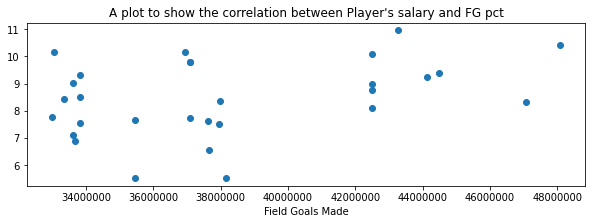

In [ ]:
x = df3['SALARY']
y = df3['Field Goals Made']
plt.figure(figsize=(10, 3)) # Change the size 
np.corrcoef(x,y)   ###  Plot a Correlation with Python
plt.scatter(x,y)   ###
plt.title("A plot to show the correlation between Player's salary and FG pct")
plt.xlabel('SALARY')
plt.xlabel('Field Goals Made')
plt.ticklabel_format(style='plain')    # to prevent scientific notation.


plt.show()

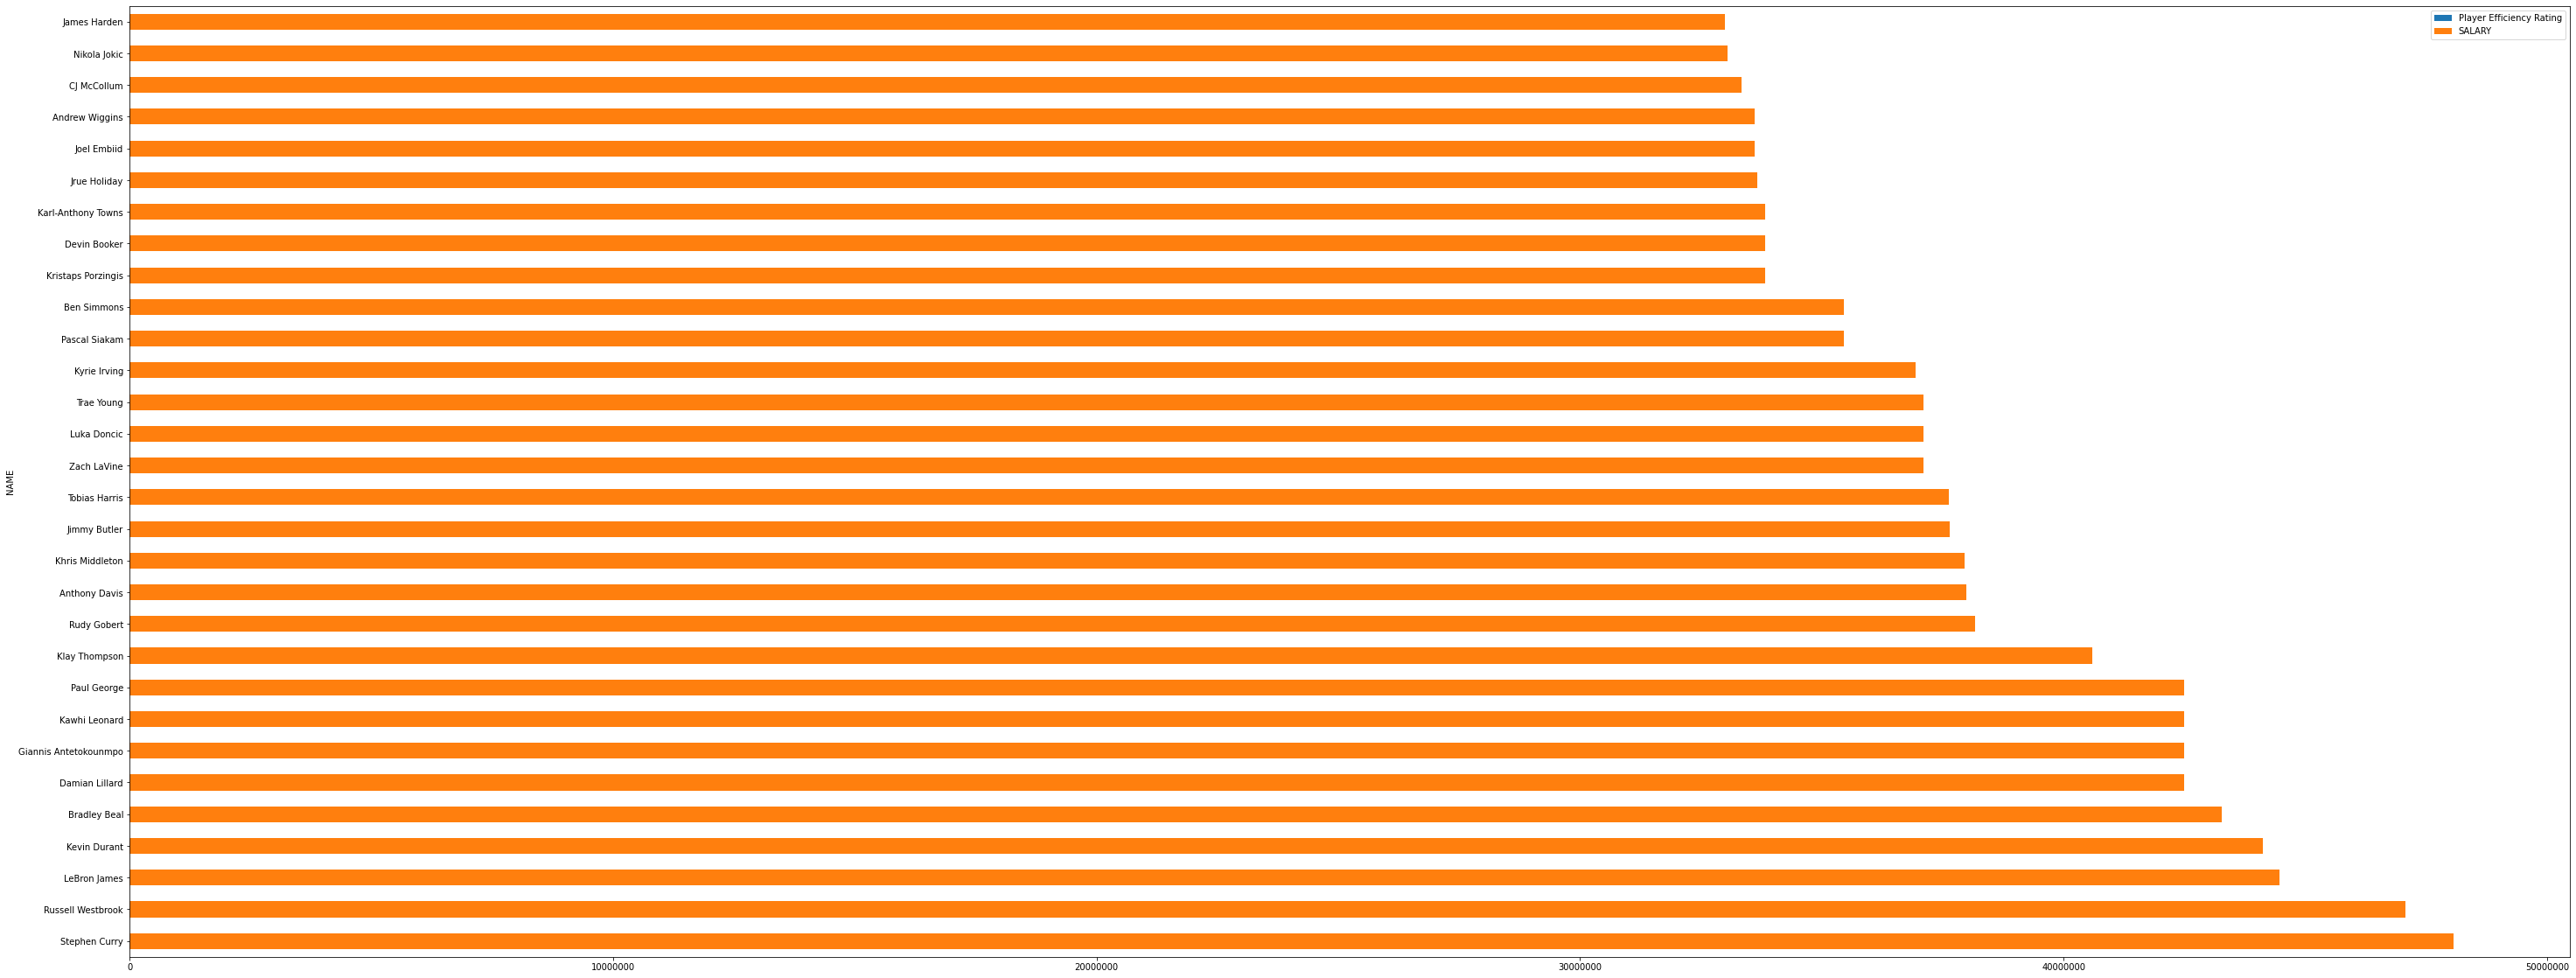

In [ ]:
#Source: https://www.pythoncharts.com/python/stacked-bar-charts/


df3[["NAME","Player Efficiency Rating","SALARY" ]].plot(x="NAME",kind="barh",stacked=True,figsize=(50, 20))
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='x') #To suppress scientific notation 
plt.show()


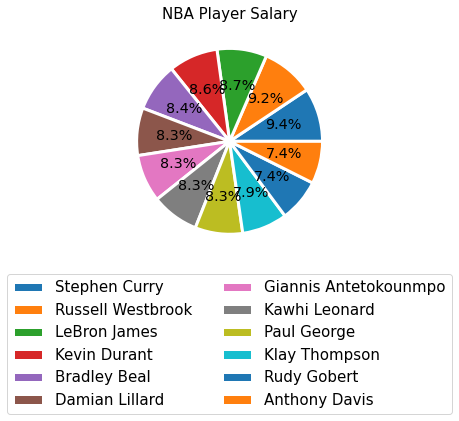

In [ ]:
x = df3['SALARY'].head(12)
y = df3['NAME'].head(12)
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(x, autopct='%.1f%%',wedgeprops={'linewidth': 3.0, 'edgecolor':'white'}, textprops={'size':'x-large'})
ax.set_title('NBA Player Salary', fontsize=15)
# Add legend
plt.legend(labels=y,fontsize=15,loc='upper center',bbox_to_anchor=(0.5, -0.04), ncol=2)
plt.tight_layout()


In [ ]:
df3.to_csv("Basketball Statistics of The Top 40 highest paid players.csv",index=False)
pd.set_option('display.float_format', lambda x: '%.5f' % x) #source: https://re-thought.com/how-to-suppress-scientific-notation-in-pandas/#:~:text=How%20to%20suppress%20scientific%20notation%20in%20Pandas%201,regex%20to%20reset%20more%20than%20one%20simultaneously.%20
df3.describe()

,SALARY,Games Played,Points,Assists,Rebounds,Steals,Blocks,Field Goals Attempted,Field Goals Made,Free Throws Attempted,Free Throws Made,Turnovers,Player Efficiency Rating
count,30.00000,29.00000,29.00000,29.00000,29.00000,29.00000,29.00000,29.00000,29.00000,29.00000,29.00000,29.00000,29.00000
mean,38262123.13333,57.31034,23.70483,5.65310,7.14586,1.09310,0.73310,17.11207,8.46000,5.75138,4.71103,2.84414,29.71030
std,4447882.36785,10.12812,4.50068,2.51813,2.61164,0.32825,0.55169,3.11260,1.39852,2.01872,1.76541,0.91911,5.17813
min,33000000.00000,35.00000,14.05000,1.25000,3.85000,0.47000,0.12000,8.15000,5.51000,2.27000,1.78000,1.19000,20.00127
25%,33833400.00000,51.00000,20.37000,4.37000,4.90000,0.89000,0.39000,15.88000,7.63000,4.15000,3.28000,2.06000,25.19418
50%,37364775.00000,59.00000,24.61000,5.44000,6.76000,1.09000,0.59000,17.50000,8.44000,5.67000,4.37000,3.06000,29.54581
75%,42492492.00000,66.00000,26.94000,6.80000,7.98000,1.28000,0.99000,19.03000,9.38000,7.14000,6.00000,3.43000,33.38524
max,48070014.00000,72.00000,31.98000,11.64000,13.55000,1.93000,2.68000,22.69000,10.97000,10.75000,9.24000,4.79000,39.74278
